<a href="https://colab.research.google.com/github/iasolb/ECON3916-Statistics-MachineLearning/blob/main/class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manual Approach

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
dct = {
"Country": ["United States", "Argentina", "Australia", "Brazil", "Britain", "China", "Egypt", "Euro area", "Hong Kong", "Indonesia", "Japan", "Mexico", "Norway", "Pakistan", "Philippines", "Russia", "Saudi Arabia", "South Africa", "South Korea"],
"iso_a3":['USA','ARG','AUS','BRA','GBR','CHN','EGY','EUZ','HKG','IDN','JPN','MEX','NOR','PAK','PHL','RUS','SAU','ZAF','KOR'],
"local_price": [4.79,28,5.3,13.5,2.89,17.2,16.93,3.68,18.8,27939,370,49,48,300,163,89,11,25.5, 4100],
"dollar_price": [4.79,3.25,4.32,5.21,4.37,2.77,2.30,4.26,2.43,2.24,3.14,3.35,6.30,2.98,3.67,1.36,2.93,2.22,3.78],
"dollar_ex": [1,8.62,1.23,2.59,0.66,6.21,7.36,0.86,7.74,12472,117.83,14.63,7.62,100.67,44.41,65.44,3.75,11.49,1084.66]
}
df = pd.DataFrame(dct)
df

,Country,iso_a3,local_price,dollar_price,dollar_ex
0,United States,USA,4.79,4.79,1.00
1,Argentina,ARG,28.00,3.25,8.62
2,Australia,AUS,5.30,4.32,1.23
3,Brazil,BRA,13.50,5.21,2.59
4,Britain,GBR,2.89,4.37,0.66
5,China,CHN,17.20,2.77,6.21
6,Egypt,EGY,16.93,2.30,7.36
7,Euro area,EUZ,3.68,4.26,0.86
8,Hong Kong,HKG,18.80,2.43,7.74
9,Indonesia,IDN,27939.00,2.24,12472.00


In [29]:
# 1. Calculate the price in USD
# Logic: Local Price / Exchange Rate
df['dollar_price'] = df['local_price'] / df['dollar_ex']

# 2. Identify the US Price (The Benchmark)
us_price = df.loc[df['iso_a3'] == 'USA', 'dollar_price'].values

# 3. Calculate Implied PPP
# Logic: The exchange rate that WOULD equalise prices
df['implied_ppp'] = df['local_price'] / us_price

# 4. Calculate Valuation (Undervalued / Overvalued)
# Logic: (Implied - Actual) / Actual
df['valuation'] = (df['implied_ppp'] - df['dollar_ex']) / df['dollar_ex']

# 5. Convert to Percentage for readability
df['valuation_pct'] = df['valuation'] * 100

# Display results sorted by valuation
print(df[['Country', 'dollar_price', 'valuation_pct']].sort_values('valuation_pct'))

          Country  dollar_price  valuation_pct
15         Russia      1.360024     -71.607005
17   South Africa      2.219321     -53.667617
9       Indonesia      2.240138     -53.233029
6           Egypt      2.300272     -51.977625
8       Hong Kong      2.428941     -49.291429
5           China      2.769726     -42.176905
16   Saudi Arabia      2.933333     -38.761308
13       Pakistan      2.980034     -37.786351
10          Japan      3.140117     -34.444319
1       Argentina      3.248260     -32.186642
11         Mexico      3.349282     -30.077614
14    Philippines      3.670345     -23.374854
18    South Korea      3.779986     -21.085880
7       Euro area      4.279070     -10.666602
2       Australia      4.308943     -10.042942
4         Britain      4.378788      -8.584804
0   United States      4.790000       0.000000
3          Brazil      5.212355       8.817437
12         Norway      6.299213      31.507570


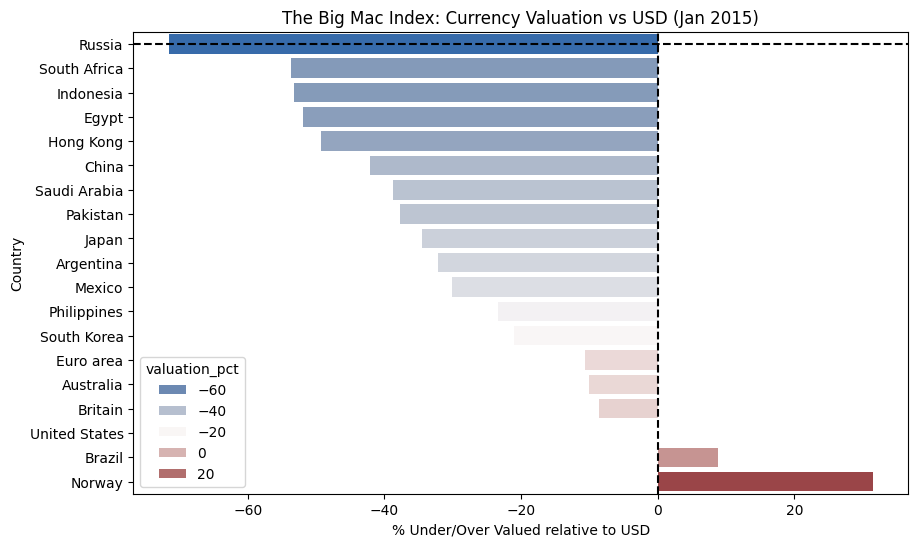

In [33]:
plt.figure(figsize=(10, 6))
# Create a bar plot
sns.barplot(x='valuation_pct', y='Country', data=df.sort_values('valuation_pct'), palette="vlag", hue="valuation_pct")

# Add a horizontal line at 0 (Fair Value)
plt.axhline(y=0, color='black', linestyle='--')

# Add a vertical line at 0 (Fair Value)
plt.axvline(x=0, color='black', linestyle='--')

plt.title('The Big Mac Index: Currency Valuation vs USD (Jan 2015)')
plt.xlabel('% Under/Over Valued relative to USD')
plt.show()

## Big Mac API Calls

In [44]:
# Loading the full dataset from GitHub
# Note: We must use the "Raw" URL, not the "Blob" URL from the browser bar.
url = "https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-full-index.csv"

full_df = pd.read_csv(url)

print(full_df.columns)
full_df

Index(['date', 'iso_a3', 'currency_code', 'name', 'local_price', 'dollar_ex',
       'dollar_price', 'USD_raw', 'EUR_raw', 'GBP_raw', 'JPY_raw', 'CNY_raw',
       'GDP_bigmac', 'adj_price', 'USD_adjusted', 'EUR_adjusted',
       'GBP_adjusted', 'JPY_adjusted', 'CNY_adjusted'],
      dtype='object')


,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_bigmac,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.0000,2.500000,0.11607,0.05007,-0.16722,-0.09864,1.09091,8317.724800,1.941077,0.36397,NaN,-0.07809,0.09763,0.96247
1,2000-04-01,AUS,AUD,Australia,2.59,1.6800,1.541667,-0.31176,-0.35246,-0.48645,-0.44416,0.28939,28023.744000,2.287635,-0.28631,NaN,-0.51761,-0.42567,0.02686
2,2000-04-01,BRA,BRL,Brazil,2.95,1.7900,1.648045,-0.26427,-0.30778,-0.45102,-0.40581,0.37836,4511.789017,1.874144,-0.06873,NaN,-0.37055,-0.25058,0.33990
3,2000-04-01,CAN,CAD,Canada,2.85,1.4700,1.938776,-0.13448,-0.18566,-0.35417,-0.30099,0.62152,24539.928589,2.226367,-0.07777,NaN,-0.37666,-0.25785,0.32689
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.7000,3.470588,0.54937,0.45774,0.15609,0.25130,1.90267,23524.312569,2.208506,0.66423,NaN,0.12486,0.33926,1.39447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,2025-01-01,URY,UYU,Uruguay,299.00,43.2700,6.910099,0.19345,0.16079,0.20684,1.22210,0.96405,16280.833689,4.318840,0.48336,0.27367,0.35726,1.55658,0.99265
1890,2025-01-01,USA,USD,United States,5.79,1.0000,5.790000,0.00000,-0.02737,0.01122,0.86191,0.64569,82715.100000,5.367929,0.00000,-0.14136,-0.08501,0.72351,0.34334
1891,2025-01-01,VEN,VES,Venezuela,252.00,56.5814,4.453760,-0.23078,-0.25184,-0.22215,0.43221,0.26589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,2025-01-01,VNM,VND,Vietnam,76000.00,25078.0000,3.030545,-0.47659,-0.49092,-0.47072,-0.02546,-0.13863,7764.116477,4.184349,-0.32854,-0.42345,-0.38562,0.15727,-0.09800


NameError: name 'raw' is not defined